<a href="https://colab.research.google.com/github/kake08/chembl_ml/blob/main/code/CDD_ML_Part_5_Compare_Regressors2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In Part 5, we will be comparing several ML algorithms for building regression models of acetylcholinesterase inhibitors.

# Import Libraries

In [19]:
! pip install lazypredict

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Load Dataset

In [21]:
df = pd.read_csv('/content/replicase_polyprotein_1ab_bioactivity_data_2class_pIC50_pubchem_fp.csv')


In [22]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

# Data preprocessing


In [23]:
X.shape

(4033, 881)

In [24]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4033, 164)

In [25]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Compare ML Algorithms

In [26]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 3226, number of used features: 164
[LightGBM] [Info] Start training from score 6.085639
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 3226, number of used features: 164
[LightGBM] [Info] Start training from score 6.085639


In [27]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.88,0.88,0.46,0.35
DecisionTreeRegressor,0.88,0.88,0.46,0.20
ExtraTreesRegressor,0.88,0.88,0.46,7.62
GaussianProcessRegressor,0.88,0.88,0.46,5.02
XGBRegressor,0.86,0.87,0.48,0.40
RandomForestRegressor,0.85,0.85,0.51,4.80
BaggingRegressor,0.83,0.84,0.53,0.74
MLPRegressor,0.79,0.80,0.59,7.60
HistGradientBoostingRegressor,0.76,0.77,0.64,1.30


In [28]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.53,0.63,0.81,4.79
HistGradientBoostingRegressor,0.53,0.62,0.82,1.22
BaggingRegressor,0.50,0.60,0.84,0.52
LGBMRegressor,0.50,0.60,0.84,0.57
SVR,0.50,0.60,0.84,1.42
NuSVR,0.50,0.60,0.85,1.83
XGBRegressor,0.49,0.59,0.85,0.67
KNeighborsRegressor,0.45,0.56,0.89,0.13
MLPRegressor,0.42,0.54,0.91,5.78


# Data visualisation of model performance

[(0.0, 1.0)]

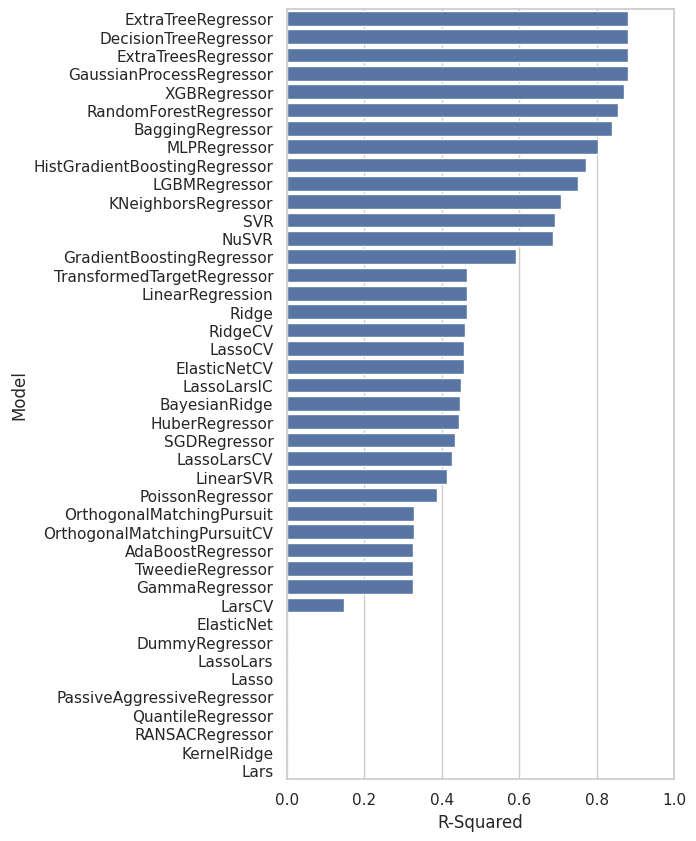

In [29]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

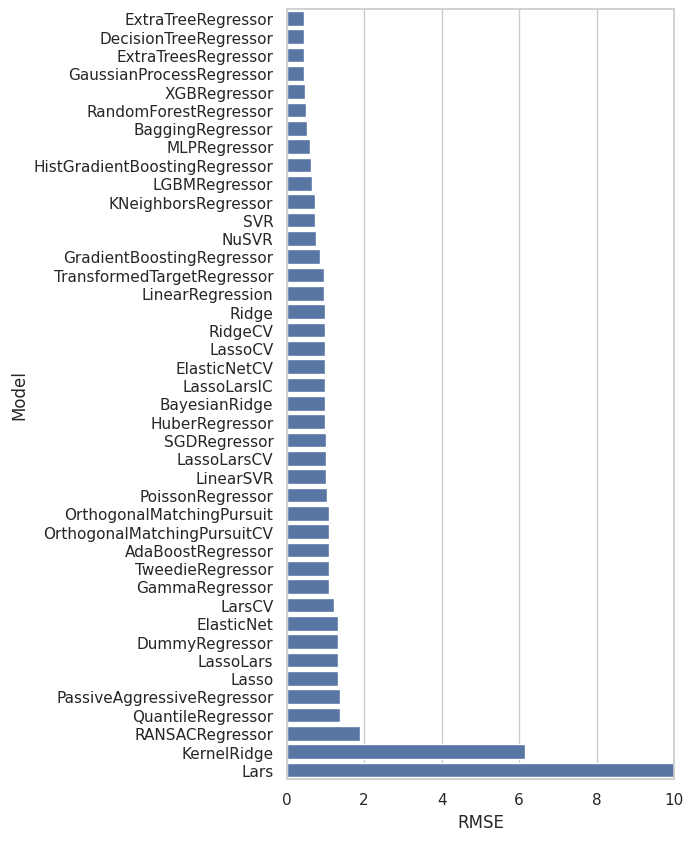

In [30]:

# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

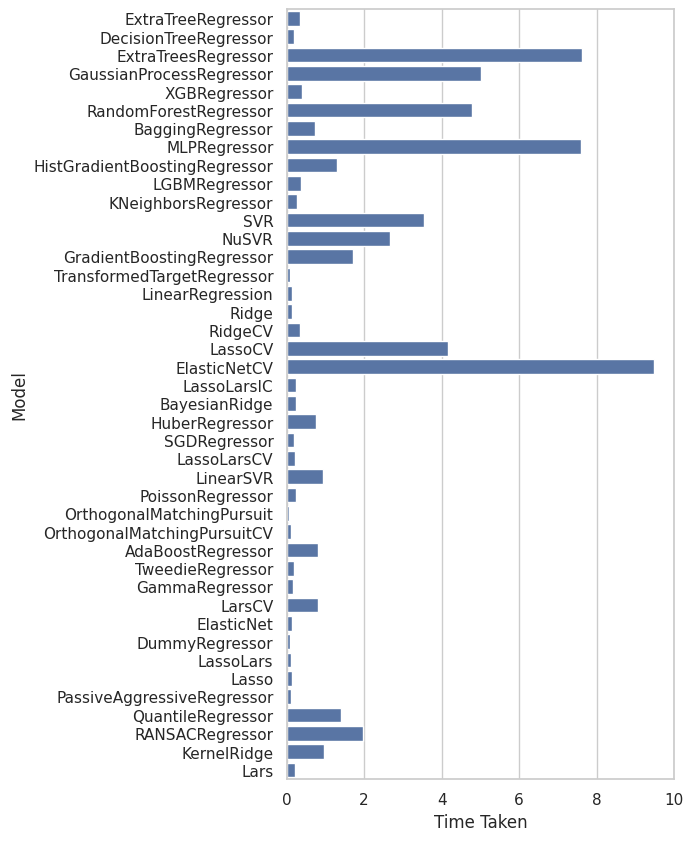

In [31]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [32]:
! jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --to notebook --inplace CDD_ML_Part_5_Compare_Regressors.ipynb

[NbConvertApp] WARNING | pattern 'CDD_ML_Part_5_Compare_Regressors.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_ye